Generation 1: Best Distance = 5104.11
Generation 2: Best Distance = 5104.11
Generation 3: Best Distance = 5101.56
Generation 4: Best Distance = 5033.89
Generation 5: Best Distance = 4954.31
Generation 6: Best Distance = 4618.07
Generation 7: Best Distance = 4618.07
Generation 8: Best Distance = 4614.52
Generation 9: Best Distance = 4521.15
Generation 10: Best Distance = 4277.60
Generation 11: Best Distance = 3901.86
Generation 12: Best Distance = 4101.33
Generation 13: Best Distance = 4137.30
Generation 14: Best Distance = 4095.90
Generation 15: Best Distance = 3848.92
Generation 16: Best Distance = 3727.48
Generation 17: Best Distance = 3609.47
Generation 18: Best Distance = 3596.99
Generation 19: Best Distance = 3609.47
Generation 20: Best Distance = 3609.47
Generation 21: Best Distance = 3596.99
Generation 22: Best Distance = 3593.80
Generation 23: Best Distance = 3593.80
Generation 24: Best Distance = 3593.80
Generation 25: Best Distance = 3593.80
Generation 26: Best Distance = 359

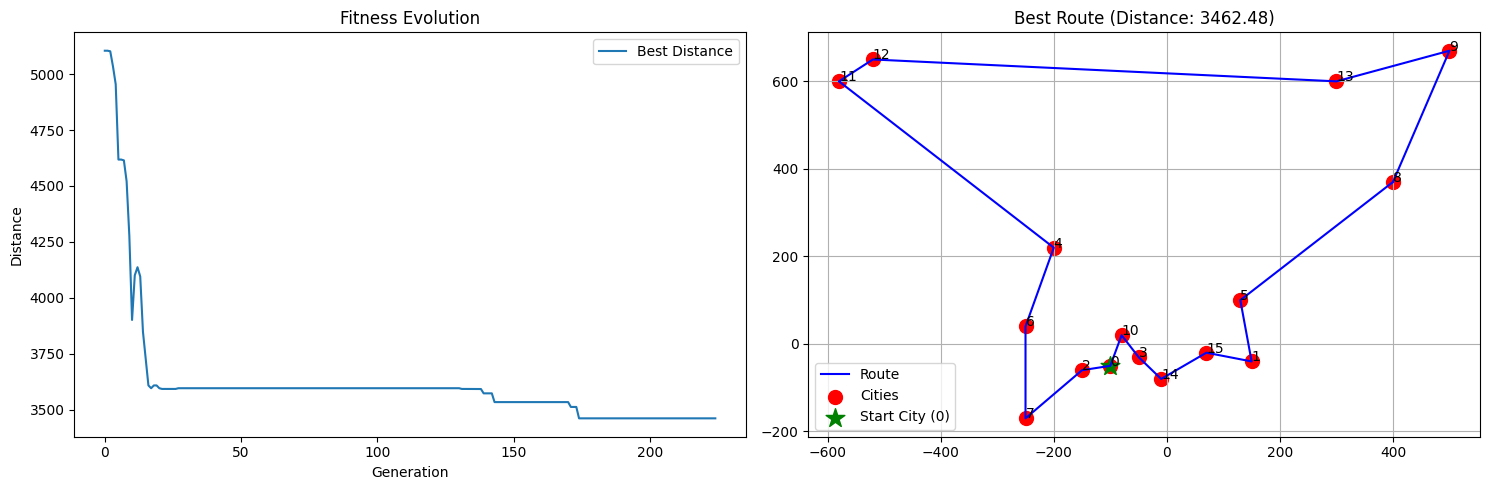

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List, Tuple

# Tọa độ các thành phố
coordinates = [
    (-100.0, -50.0), (150.0, -40.0),
    (-150.0, -60.0), (-50.0, -30.0),
    (-200.0, 220.0), (130.0, 100.0),
    (-250.0, 40.0), (-250.0, -170.0),
    (400.0, 370.0), (500.0, 670.0),
    (-80.0, 20.0), (-580.0, 600.0),
    (-520.0, 650.0), (300.0, 600.0),
    (-10.0, -80.0), (70.0, -20.0),
]

class GeneticAlgorithm:
    def __init__(self, coords: List[Tuple[float, float]], pop_size: int = 100, mutation_rate: float = 0.01):
        self.coords = coords
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.n_cities = len(coords)
        self.population = self.initialize_population()

        # Lưu lịch sử fitness
        self.best_fitness_history = []
        #self.avg_fitness_history = []

    def initialize_population(self) -> List[List[int]]:
        """Khởi tạo quần thể ngẫu nhiên"""
        return [random.sample(range(self.n_cities), self.n_cities) for _ in range(self.pop_size)]
    
    def fitness(self, route: List[int]) -> float:
        """Tính tổng khoảng cách của một lộ trình"""
        return sum(
            np.sqrt((self.coords[route[i]][0] - self.coords[route[(i+1) % self.n_cities]][0]) ** 2 + 
                    (self.coords[route[i]][1] - self.coords[route[(i+1) % self.n_cities]][1]) ** 2)
            for i in range(self.n_cities)
        )
    
    def select_parents(self) -> List[List[int]]:
        """Chọn cha mẹ dựa trên tournament selection"""
        parents = []
        for _ in range(self.pop_size):
            tournament = random.sample(self.population, 5)
            best = min(tournament, key=self.fitness)
            parents.append(best)
        return parents
    
    def crossover(self, parent1: List[int], parent2: List[int]) -> List[int]:
        """Lai ghép (crossover) giữa hai cá thể cha mẹ"""
        start, end = sorted(random.sample(range(self.n_cities), 2))
        child = parent1[start:end+1]
        child += [city for city in parent2 if city not in child]
        return child
    
    def mutate(self, route: List[int]) -> List[int]:
        """Đột biến (mutation) bằng cách hoán đổi hai thành phố"""
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(self.n_cities), 2)
            route[i], route[j] = route[j], route[i]
        return route
    
    def evolve(self):
        """Tiến hóa qua một thế hệ"""
        parents = self.select_parents()
        new_population = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[(i + 1) % len(parents)]
            child = self.crossover(parent1, parent2)
            child = self.mutate(child)
            new_population.append(child)
        self.population = new_population

        # Lưu lịch sử fitness
        population_fitness = [self.fitness(route) for route in self.population]
        self.best_fitness_history.append(min(population_fitness))
        #self.avg_fitness_history.append(np.mean(population_fitness))
    
    def run(self, generations: int = 500, tolerance: float = 1e-3, patience: int = 50) -> Tuple[List[int], float]:
        """Chạy thuật toán qua số thế hệ, thêm điều kiện dừng sớm"""
        best_route = None
        best_distance = float('inf')
        no_improvement_generations = 0  # Đếm số thế hệ không có cải thiện
        
        for generation in range(generations):
            self.evolve()
            current_best = min(self.population, key=self.fitness)
            current_distance = self.fitness(current_best)
            
            # Hiển thị kết quả mỗi thế hệ
            print(f"Generation {generation + 1}: Best Distance = {current_distance:.2f}")
            
            # Kiểm tra cải thiện
            if abs(best_distance - current_distance) <= tolerance:
                no_improvement_generations += 1
            else:
                no_improvement_generations = 0
            
            # Cập nhật kết quả tốt nhất
            if current_distance < best_distance:
                best_distance = current_distance
                best_route = current_best
            
            # Điều kiện dừng sớm
            if no_improvement_generations >= patience:
                print(f"Stopping early at generation {generation + 1} due to no improvement for {patience} generations.")
                break
        
        return best_route, best_distance


    def visualize_results(self, best_route: List[int], best_distance: float):
        """Hiển thị kết quả"""
        plt.figure(figsize=(15, 5))

        # Biểu đồ tiến hóa fitness
        plt.subplot(1, 2, 1)
        plt.plot(self.best_fitness_history, label='Best Distance')
        #plt.plot(self.avg_fitness_history, label='Average Distance')
        plt.title('Fitness Evolution')
        plt.xlabel('Generation')
        plt.ylabel('Distance')
        plt.legend()

        # Biểu đồ lộ trình tốt nhất
        plt.subplot(1, 2, 2)
        x_coords = [self.coords[i][0] for i in best_route] + [self.coords[best_route[0]][0]]
        y_coords = [self.coords[i][1] for i in best_route] + [self.coords[best_route[0]][1]]
        
        plt.plot(x_coords, y_coords, 'b-', label="Route")
        plt.scatter([c[0] for c in self.coords], [c[1] for c in self.coords], c='red', s=100, label="Cities")
        for i, (x, y) in enumerate(self.coords):
            plt.text(x, y, str(i), fontsize=10, color='black')
        
        plt.scatter(self.coords[0][0], self.coords[0][1], c='green', s=200, label="Start City (0)", marker='*')
        plt.title(f'Best Route (Distance: {best_distance:.2f})')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Chạy thuật toán
ga = GeneticAlgorithm(coordinates, pop_size=100, mutation_rate=0.01)
best_route, best_distance = ga.run(generations=350)

# Hiển thị kết quả
print(f"Best Route: {best_route}")
print(f"Total Distance: {best_distance:.2f}")
ga.visualize_results(best_route, best_distance)
